## Data Visualization — Data Science Tutorial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

### Pandas plots

In [ ]:
reviews = pd.read_csv('./Data/winemag-data_first150k.csv', index_col=0)
reviews.head(1)
reviews.columns, reviews.shape
reviews.isna().sum()

#### Bar charts and categorical data

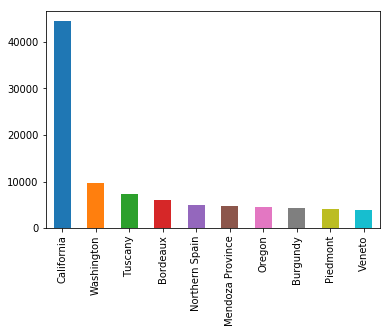

In [3]:
# using pandas visualization - number of wines(samples) per province
reviews.province.value_counts().head(10).plot.bar();

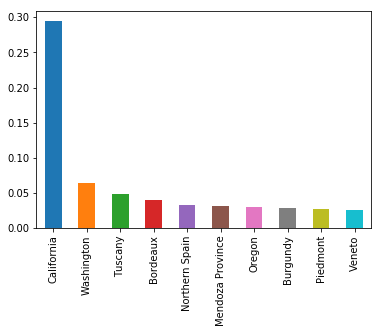

In [4]:
# taking percentages point of view shows how big is advantage of Calif.
(reviews.province.value_counts().head(10) / len(reviews)).plot.bar();

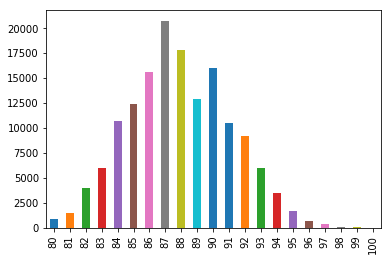

In [5]:
# example of ordinal category is a number of samples for a certain score
# it needs sort_index method because value_counts() ia an unordered
reviews['points'].value_counts().sort_index().plot.bar();

#### Line charts

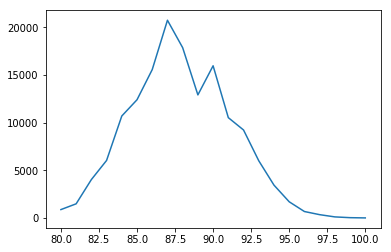

In [6]:
# the same data as above but for bigger numbers of different categories
# line chart would be better
reviews.points.value_counts().sort_index().plot.line();

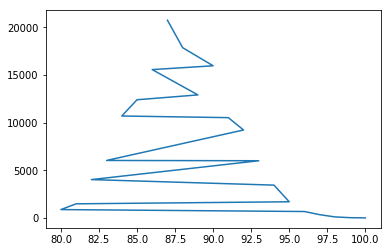

In [7]:
# without sorting an index the result is a mess
reviews.points.value_counts().plot.line();

#### Area charts

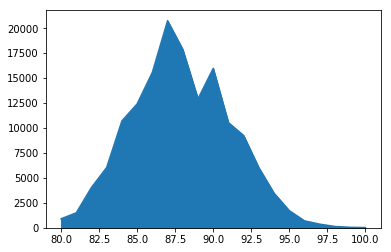

In [8]:
# the same as line chart but with fulfilled area below line chart
reviews.points.value_counts().sort_index().plot.area();

#### Histograms

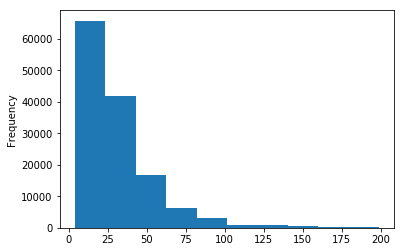

In [9]:
# an example of histogram where frequency means the number of wines
# with prices being in one bin (some singular distance on x axis)
reviews[reviews.price < 200].price.plot.hist();

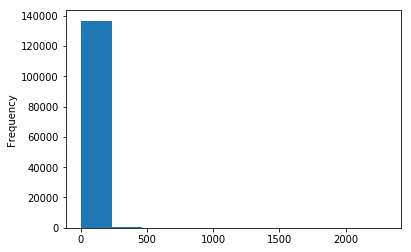

In [10]:
# a major shortcoming of histograms - they don't deal with skewed data
reviews['price'].plot.hist();

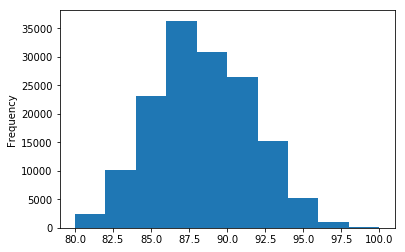

In [11]:
# histograms work really well also for ordinal categorical variables
reviews['points'].plot.hist();

### Bivariate variables

#### Scatter plot

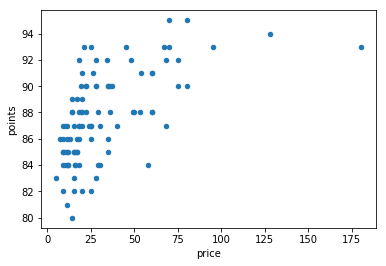

In [12]:
# scatter plot simply maps each variable of interest to a point in 
# two-dimensional space - takes only a number of samples
reviews[reviews['price'] < 200].sample(100).plot.scatter(
    x='price', y='points');

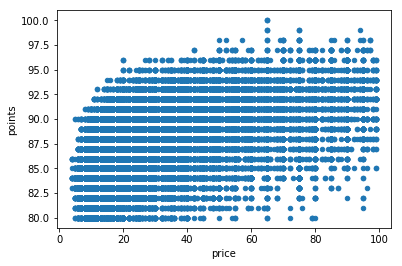

In [13]:
# takig all data, not restricting to some number of samples, make give
# the plot clogged and useless
reviews[reviews.price < 100].plot.scatter(x='price', y='points');

#### Hexplot

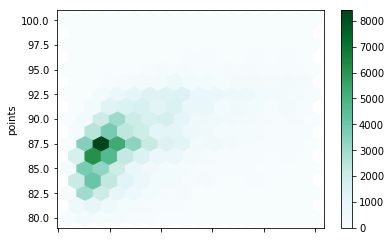

In [14]:
# hexplot is dealing with problem above by aggregating points into 
# hexagons and then colorizing them; gridsize works like resolution
reviews[reviews.price < 100].plot.hexbin(x='price', y='points',
                                        gridsize=15)

#### Stacked plots

In [15]:
# new dataframe with only 5 best wine types where rows are represented
# by variable 'points' and columns by 5 wine types
wine_counts = pd.read_csv('./Data/top-five-wine-score-counts.csv', index_col=0)
wine_counts.head(3)
wine_counts.index, wine_counts.columns

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0


(Int64Index([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
              93,  94,  95,  96,  97,  98,  99, 100],
            dtype='int64', name='points'),
 Index(['Bordeaux-style Red Blend', 'Cabernet Sauvignon', 'Chardonnay',
        'Pinot Noir', 'Red Blend'],
       dtype='object'))

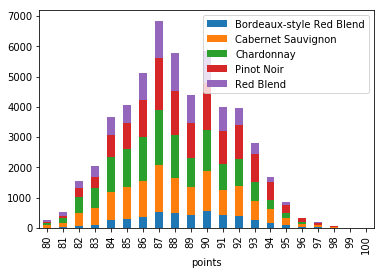

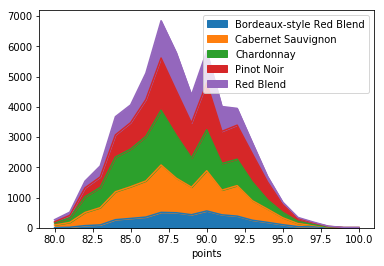

In [16]:
# stacked bar chart and area chart
wine_counts.plot.bar(stacked=True)
wine_counts.plot.area(stacked=True);

#### Bivariate line charts

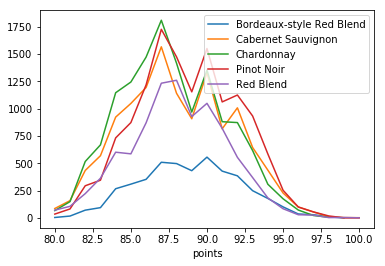

In [17]:
# because of little space it takes line charts are effective to show
# more plots than above and also to interpret it
wine_counts.plot.line();

In [18]:
# new dataframe
pokemon = pd.read_csv('./Data/Pokemon.csv', index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [19]:
pokemon.shape
pokemon.columns

(800, 12)

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

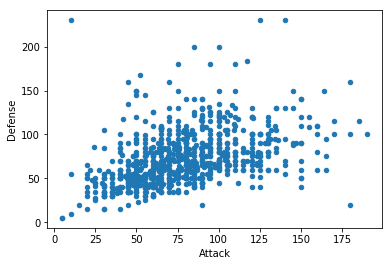

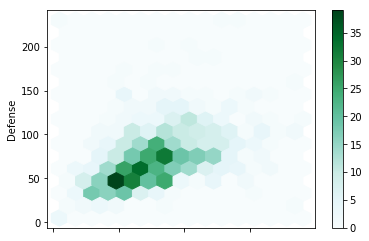

In [20]:
# exercise with coding to get plots as below
pokemon.plot.scatter(x='Attack', y='Defense')
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=15);

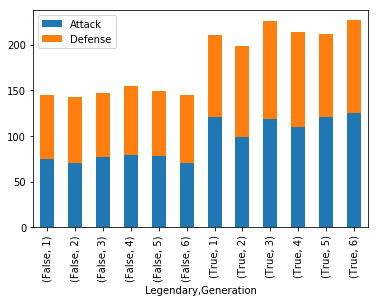

In [21]:
# next exercise with data above
pokemon_stats_legendary = pokemon.groupby(['Legendary',
                        'Generation']).mean()[['Attack', 'Defense']]
#pokemon_stats_legendary
pokemon_stats_legendary.plot.bar(stacked=True);

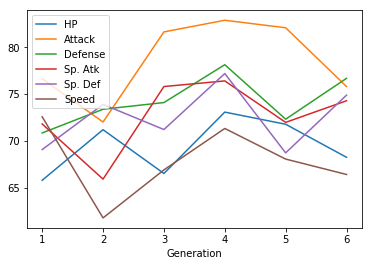

In [22]:
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[[
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation.plot.line();

### Styling plots

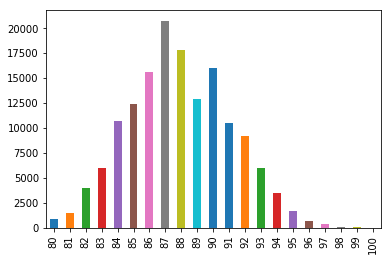

In [23]:
# plot without style - small, no axes titles, legend, plot titles, etc
reviews['points'].value_counts().sort_index().plot.bar();

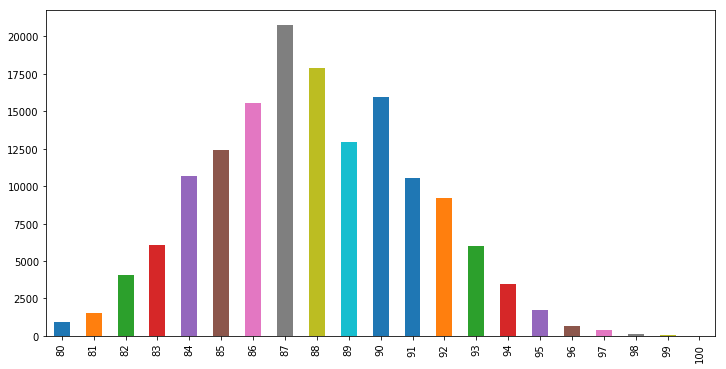

In [24]:
# figsize controls the size of image in inches - it expects a tuple
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12,6));

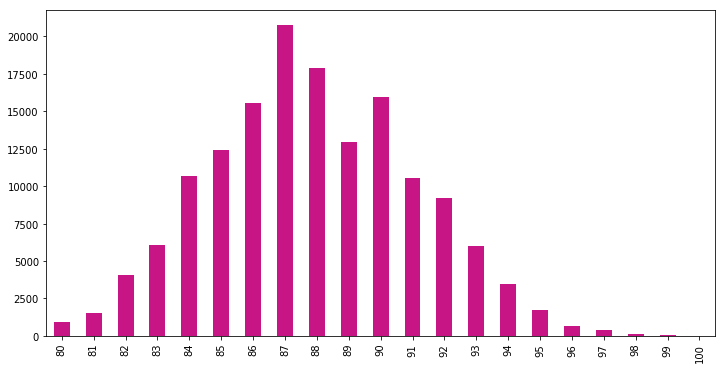

In [25]:
# color has been added, default colors are like a plot above
reviews.points.value_counts().sort_index().plot.bar(figsize=(12,6),
                                     color='mediumvioletred');

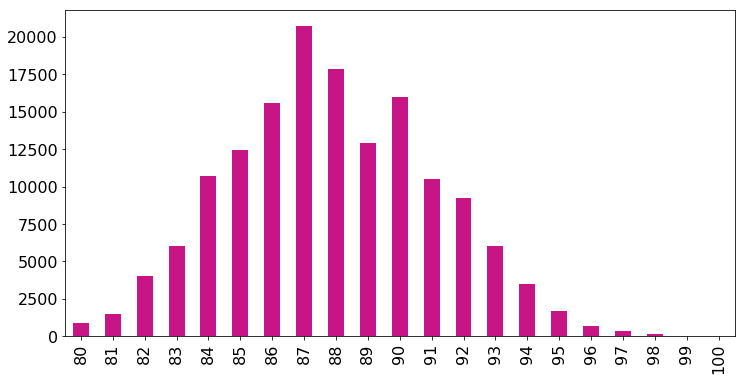

In [26]:
# adding size of text labels for both axes
reviews.points.value_counts().sort_index().plot.bar(figsize=(12,6),
                                color='mediumvioletred', fontsize=16);

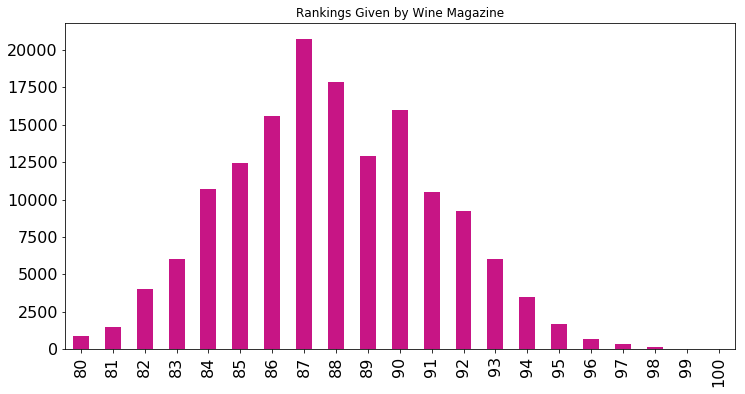

In [27]:
# supplementing the plot with its title
reviews.points.value_counts().sort_index().plot.bar(
                        figsize=(12,6),
                        color='mediumvioletred',
                        fontsize=16,
                        title='Rankings Given by Wine Magazine');

Text(0.5, 1.0, 'Rankings Given by Wine Magazine')

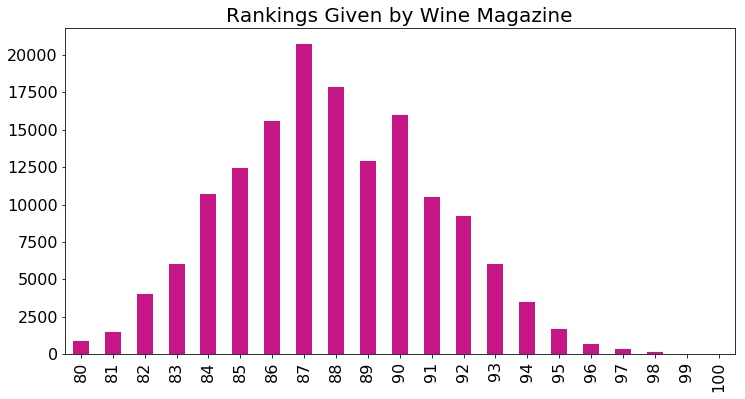

In [28]:
# the title looks so small but in pandas there is no immediate tool so.
import matplotlib.pyplot as plt

ax = reviews.points.value_counts().sort_index().plot.bar(
        figsize=(12,6),
        color='mediumvioletred',
        fontsize=16)
ax.set_title('Rankings Given by Wine Magazine', fontsize=20)

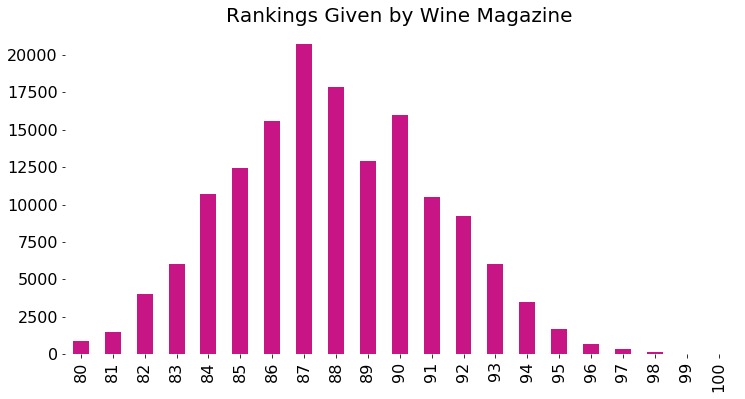

In [29]:
# using seaborn style and its despine() method makes plot even nicer
# while the black borders of the plot are turned off
import seaborn as sns
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='mediumvioletred',
    fontsize=16)
ax.set_title('Rankings Given by Wine Magazine', fontsize=20)
sns.despine(bottom=True, left=True);

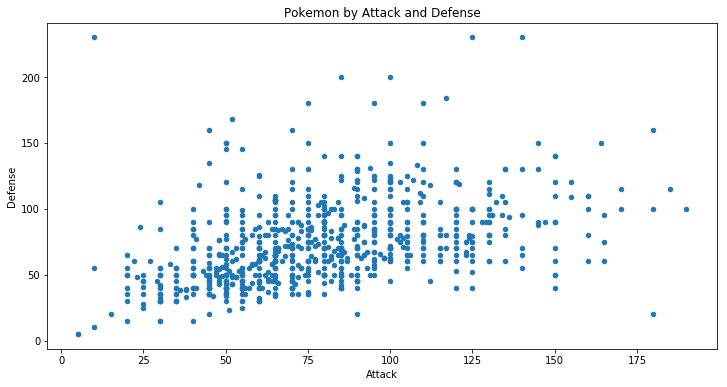

In [30]:
# plotting exercises (the plot is shown but without code - has to be replicated)
pokemon.plot.scatter(x='Attack',
                     y='Defense',
                     figsize=(12,6),
                    title='Pokemon by Attack and Defense');

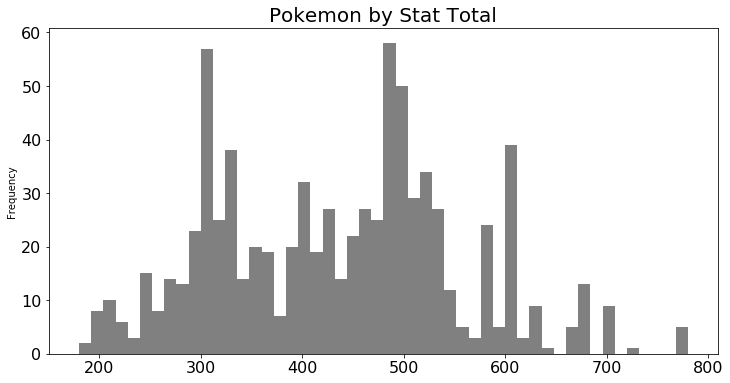

In [31]:
ax = pokemon['Total'].plot.hist(
                                figsize=(12,6),
                                color='grey',
                                fontsize=16,
                                bins=50)
ax.set_title('Pokemon by Stat Total', fontsize=20);

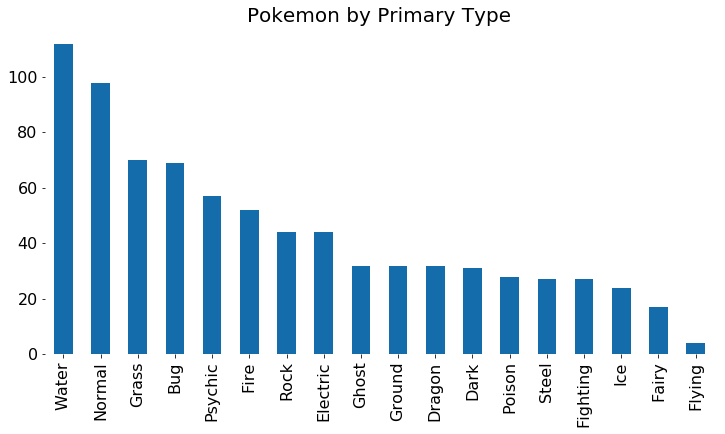

In [32]:
# another plot for exercising
ax = pokemon['Type 1'].value_counts().plot.bar(
        figsize=(12,6),
        color='#146CAB',
        fontsize=16)
ax.set_title('Pokemon by Primary Type', fontsize=20)
sns.despine(bottom=True, left=True);

### Subplots

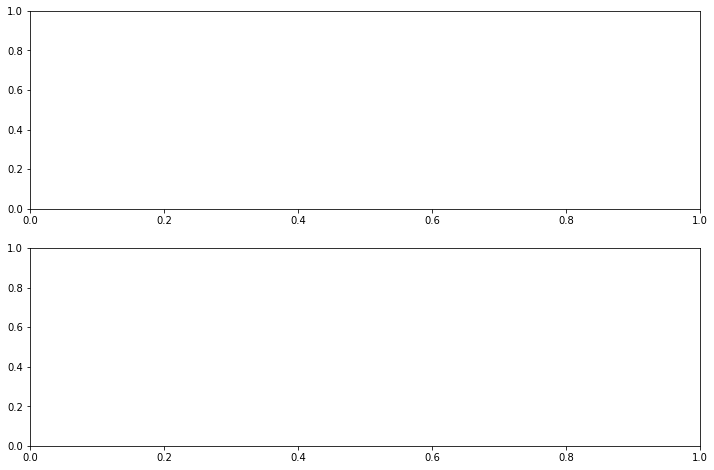

In [33]:
# creating multiple plots in one overall figure (variable names not so
# important but fig, ax are the most recognizable, axarr means array of axes)
# subplots take 2 arguments: first-rows number, second-columns number
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 1, figsize=(12,8))

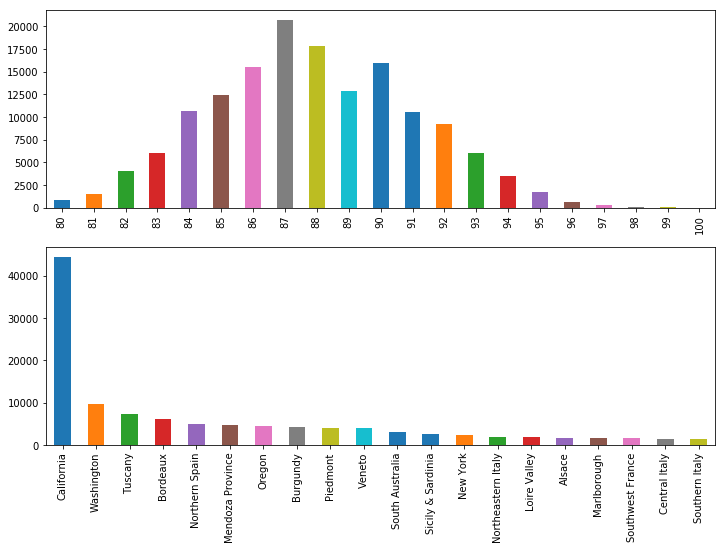

In [34]:
# making one of the plots needs passing to pandas the proper object via
# 'ax' parameter (inside plot.bar() for example)
fig, axarr = plt.subplots(2, 1, figsize=(12,8))

reviews['points'].value_counts().sort_index().plot.bar(ax=axarr[0])

reviews['province'].value_counts().head(20).plot.bar(ax=axarr[1]);

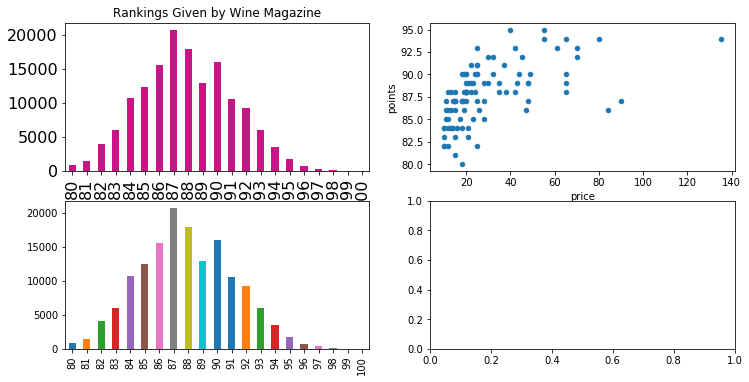

In [35]:
# there are no limits in number of plots for a figure unless visuality
fig, axarr = plt.subplots(2, 2, figsize=(12,8))
reviews.points.value_counts().sort_index().plot.bar(ax=axarr[1][0])
reviews[reviews['price'] < 200].sample(100).plot.scatter(
    ax=axarr[0][1],
    x='price',
    y='points')
reviews.points.value_counts().sort_index().plot.bar(
                        ax=axarr[0][0],
                        figsize=(12,6),
                        color='mediumvioletred',
                        fontsize=16,
                        title='Rankings Given by Wine Magazine');

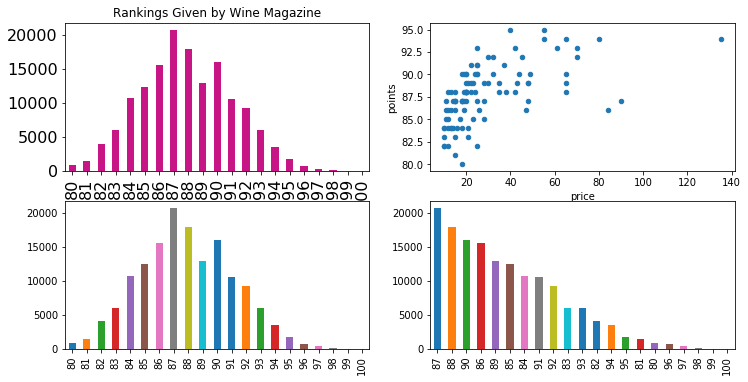

In [36]:
# adding next plot to figure object 
fig.add_axes(reviews.points.value_counts().plot.bar(ax=axarr[1,1]))
fig

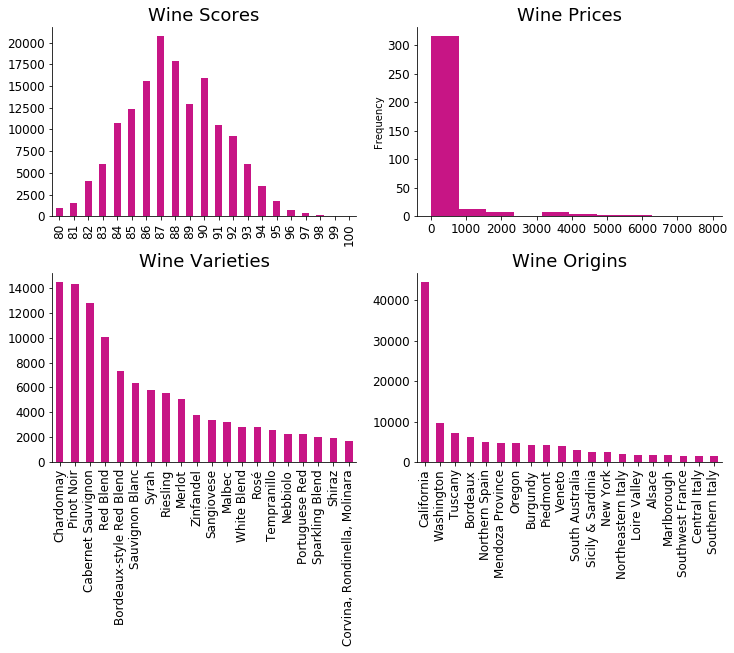

In [37]:
# fine example of plots with styling from matplotlib and seaborn
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred')
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred')
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred')
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred')
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine();

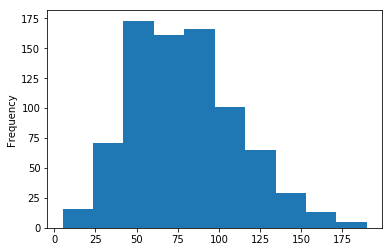

In [38]:
pokemon.head(2)
pokemon.Attack.sort_index().plot.hist();

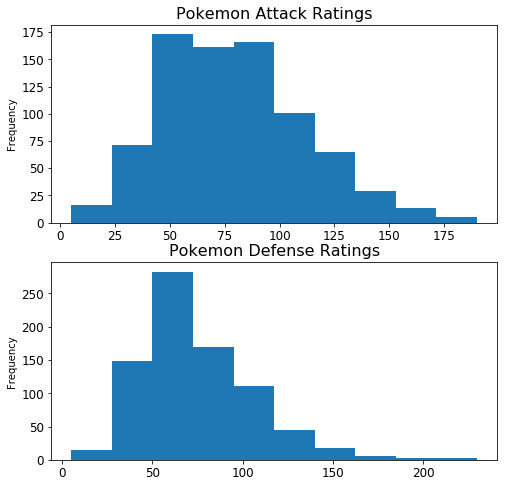

In [39]:
# exercising
fig, axarr = plt.subplots(2, 1, figsize=(8,8))

pokemon.Attack.plot.hist(ax=axarr[0], fontsize=12)
axarr[0].set_title('Pokemon Attack Ratings', fontsize=16)

pokemon.Defense.plot.hist(ax=axarr[1], fontsize=12)
axarr[1].set_title('Pokemon Defense Ratings', fontsize=16)

plt.subplots_adjust(hspace=.2);

### Plotting with Seaborn

#### Countplot

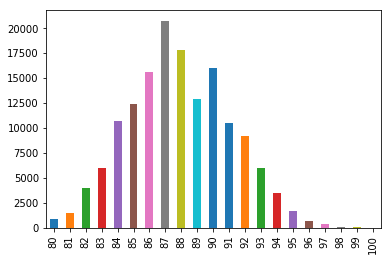

In [46]:
# countplot() is an equivalent to pandas bar plot
reviews['points'].value_counts().sort_index().plot.bar();

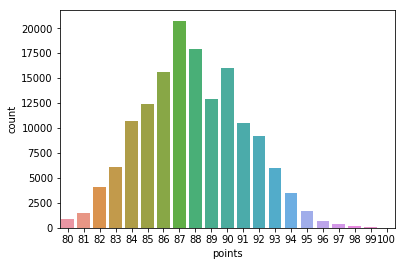

In [47]:
# code is easier and (only to remember function) and view better
sns.countplot(reviews['points']);

#### KDE Plot

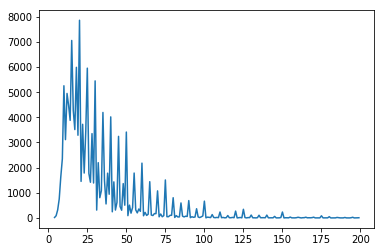

In [55]:
# pandas line chart - quite long code, 'jagged' because of disruptive changes
# in data
reviews[reviews.price < 200].price.value_counts().sort_index().plot.line();

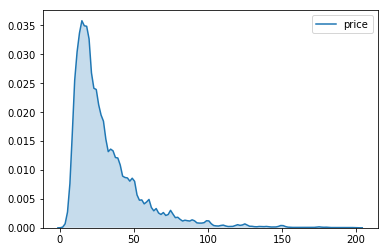

In [80]:
# seaborn chart is not 'jagged' - it is 'smoothed' but shows so called
# 'kernel density estimate' - probability not frequency of some x data
sns.kdeplot(reviews.query('price < 200').price, shade=True);

c:\users\14000322\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


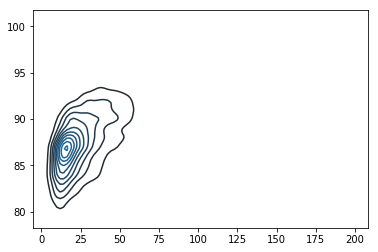

In [86]:
# kdeplot() with 2 variables returns two dimensional chart (bivariate)
# code with data given as a dataframe - is being deprecated
sns.kdeplot(reviews[
    reviews.price < 200].loc[:,['price','points']].dropna().sample(5000));

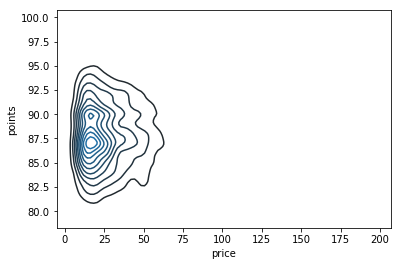

In [85]:
# code with data like x,y being pd.Series; every time running this
#code it returns another shape due to different sampling

sns.kdeplot(reviews[reviews.price < 200].price.sample(5000),
            reviews[reviews.price<200].points.sample(5000));

#### Distplot

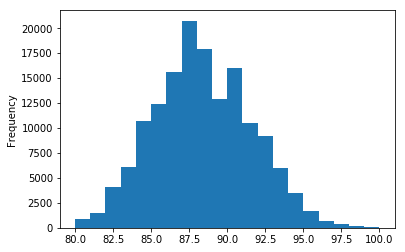

In [100]:
# distplot() is an equivalent to pandas histogram
reviews.points.plot.hist(bins=20);

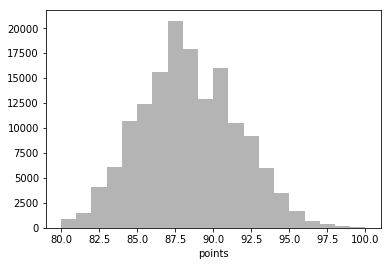

In [101]:
# distplot has als kde plot but it is optional
sns.distplot(reviews.points, bins=20, kde=False, color='#454545');

#### Scatterplot and Hexplot with jointplot()

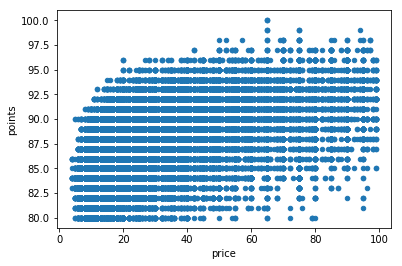

In [118]:
# scatter() is equivalent to scatterplot/jointplot but without
# sideway histograms
reviews[reviews.price < 100].plot.scatter(x='price', y='points');

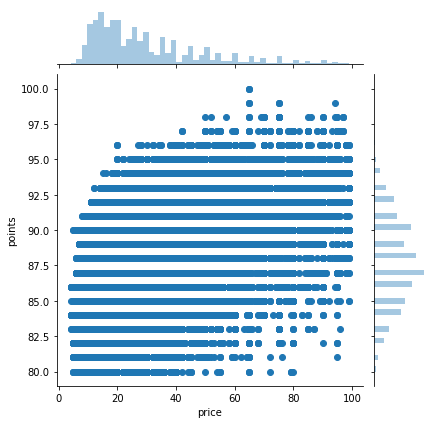

In [119]:
# plotting two variables against one another is a composite plot,
# default kind='scatter', on the sides are histograms of both vars

sns.jointplot(x='price', y='points',
              data=reviews[reviews.price < 100],
             kind='scatter');

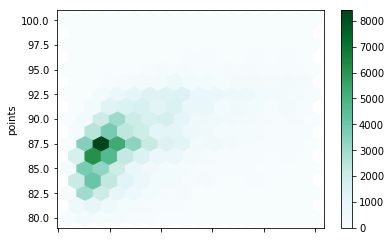

In [120]:
# hexbin() is pandas equivalent to hexplot but no sideway plots
reviews[reviews.price < 100].plot.hexbin(
                            x='price', y='points', gridsize=15);

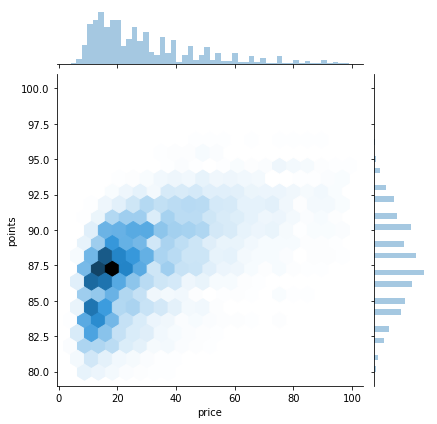

In [121]:
# hexplot is being made by using kind='hex'(also:'reg','resid','kde')
sns.jointplot(x='price', y='points',
              data=reviews[reviews.price < 100],
             kind='hex', gridsize=20);

#### Boxplot and Violinplot

In [124]:
reviews.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


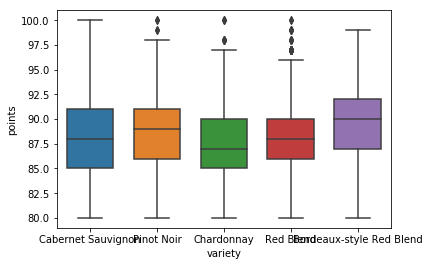

In [141]:
# creating dataframe with only top 5 wine brands (isin() method makes
# selection of all samples/rows - it is a filter type method)
df = reviews[reviews.variety.isin
        (reviews.variety.value_counts().head(5).index)]
#df.variety.unique()

sns.boxplot(x='variety', y='points', data=df, width=.7);

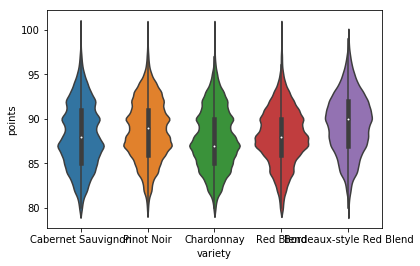

In [143]:
# the similar plot but with an additional info to interpet plot
sns.violinplot(x='variety',
               y='points',
               data=reviews[reviews.variety.isin(
                   reviews.variety.value_counts().head(5).index)]);

In [144]:
pokemon.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


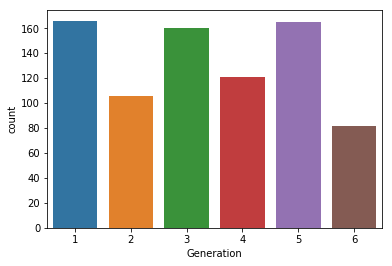

In [147]:
sns.countplot(pokemon.Generation);

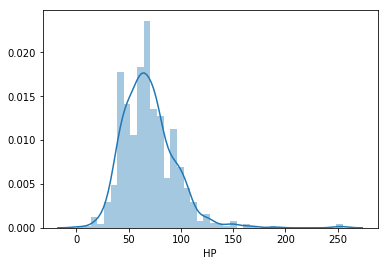

In [149]:
sns.distplot(pokemon['HP']);

c:\users\14000322\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


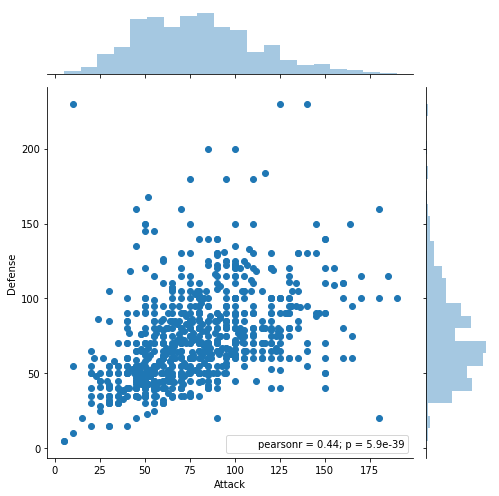

In [162]:
import scipy.stats as stats

j = sns.jointplot(x='Attack', y='Defense', data=pokemon, height=7)
j.annotate(stats.pearsonr);

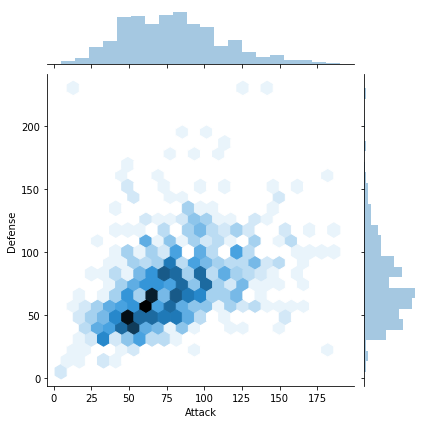

In [164]:
sns.jointplot(kind='hex', x=pokemon.Attack, y=pokemon.Defense);

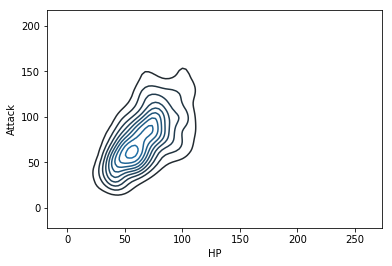

In [167]:
sns.kdeplot(pokemon['HP'], pokemon['Attack']);

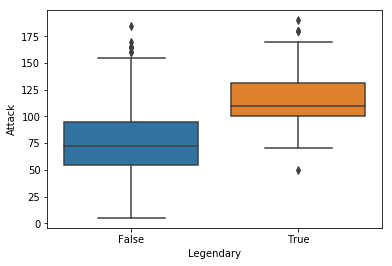

In [169]:
sns.boxplot(x=pokemon.Legendary, y=pokemon.Attack);

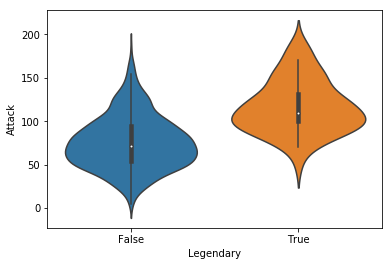

In [170]:
sns.violinplot(x=pokemon.Legendary, y=pokemon.Attack);

### Faceting with Seaborn